In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import file

In [2]:
import os
import tarfile
import urllib
dataset_path = os.path.join("dataset")
download_url="https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
def fetch_data(download_url= download_url, dataset_path= dataset_path):
    os.makedirs(dataset_path, exist_ok= True)
    tgz_path = os.path.join(dataset_path, "housing.tgz")
    urllib.request.urlretrieve(download_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path= dataset_path)
    housing_tgz.close()
fetch_data()
def load_data(dataset_path= dataset_path):
    csv_path = os.path.join(dataset_path, "housing.csv")
    return pd.read_csv(csv_path)
hd = load_data()
hd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
hd.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Checking for null values and missing data

In [7]:
hd = hd.drop_duplicates() 
hd.duplicated().values.any()

False

In [6]:
hd = hd.fillna(method="ffill")
pd.isnull(hd).any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

### Feature Engineering

In [104]:
hd['avg_perhouse_pop']=hd['households']/hd['population']
hd['avg_prehouse_room']=hd['total_rooms']/hd['population']

In [105]:
hd.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'avg_perhouse_pop',
       'avg_prehouse_room'],
      dtype='object')

#### median_house_value is the dependent variable, the rest of the columns are the features

### Final size of data

In [106]:
hd.shape

(20640, 12)

### Data visualisation

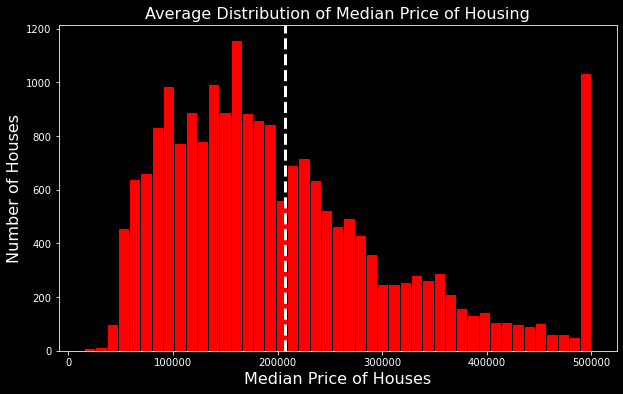

In [107]:
plt.figure(figsize=(10, 6))
plt.hist(hd.median_house_value, bins = 45, ec = 'black', color = 'red')
plt.xlabel('Median Price of Houses', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Median Price of Housing', fontsize=16)
plt.axvline(hd['median_house_value'].mean(), color='white', linestyle='dashed', linewidth=3, label='Average Price of House in a block')
plt.show()

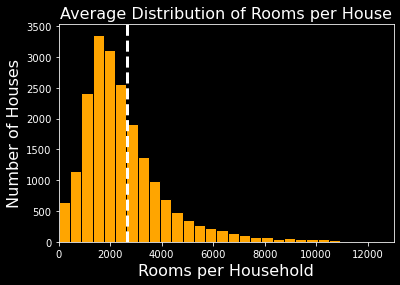

In [108]:
plt.figure()
plt.hist(hd.total_rooms, bins = 90, ec = 'black', color = 'orange')
plt.xlim(0,13000)
plt.xlabel('Rooms per Household', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Rooms per House', fontsize=16)
plt.axvline(hd['total_rooms'].mean(), color='white', linestyle='dashed', linewidth=3, label='Average Price of House in a block')
plt.show()

Text(0.5, 1.0, 'Distribution of Households based on location')

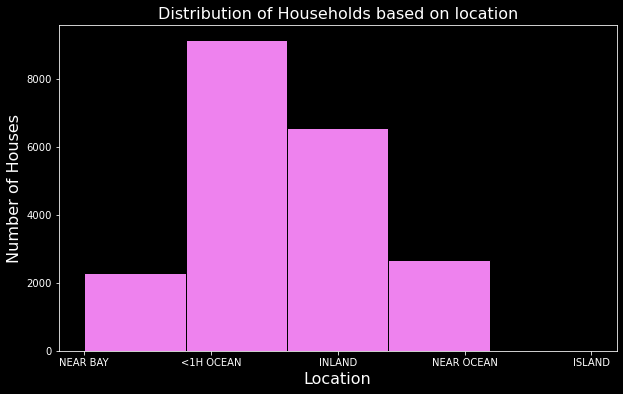

In [109]:
plt.figure(figsize=(10, 6))
plt.hist(hd.ocean_proximity, bins = 5, ec = 'black', color = 'violet')
plt.xlabel('Location', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Distribution of Households based on location', fontsize=16)

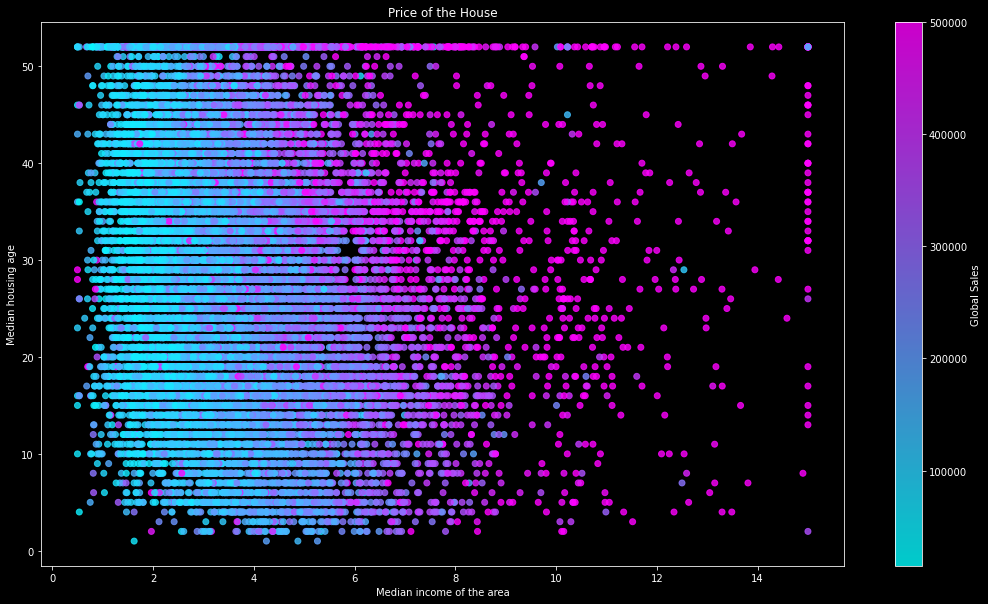

In [110]:
plt.figure(figsize=(18,10))
plt.scatter(hd['median_income'],hd['housing_median_age'],c=hd['median_house_value'], cmap='cool', alpha = 0.8)
plt.colorbar().set_label("Global Sales")
plt.title('Price of the House')
plt.xlabel('Median income of the area')
plt.ylabel('Median housing age')
plt.show()

In [111]:
hdx=hd.groupby('ocean_proximity')['median_house_value'].sum()

<AxesSubplot:ylabel='median_house_value'>

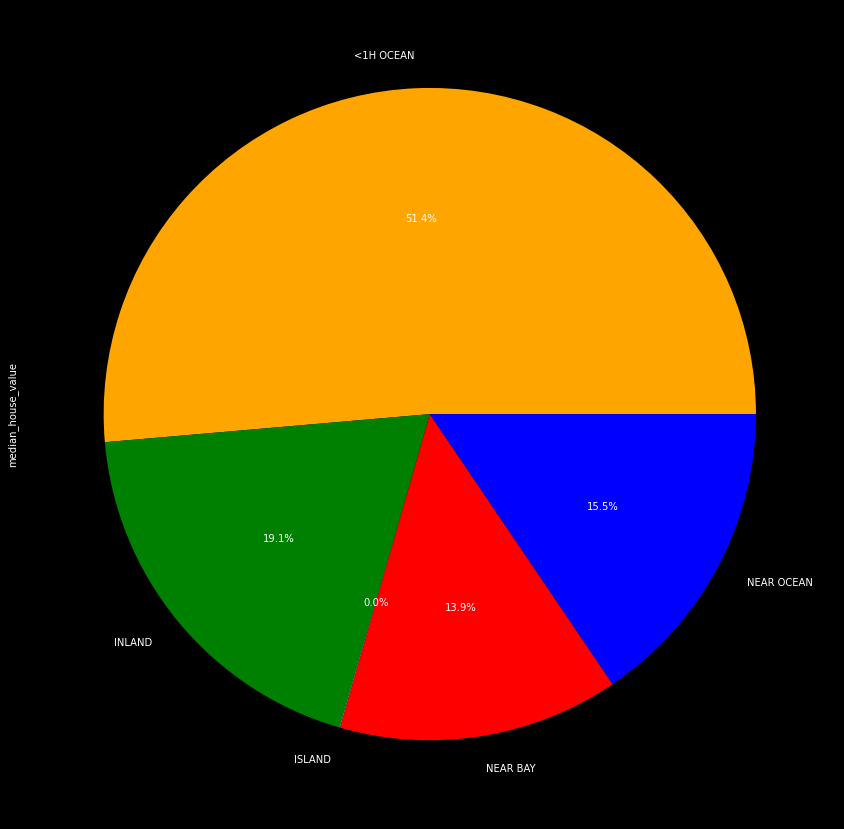

In [112]:
colors=["orange", "green", "grey", "red","blue"]
hdx.plot(kind='pie',autopct='%1.1f%%',figsize=(15,15), colors=colors)

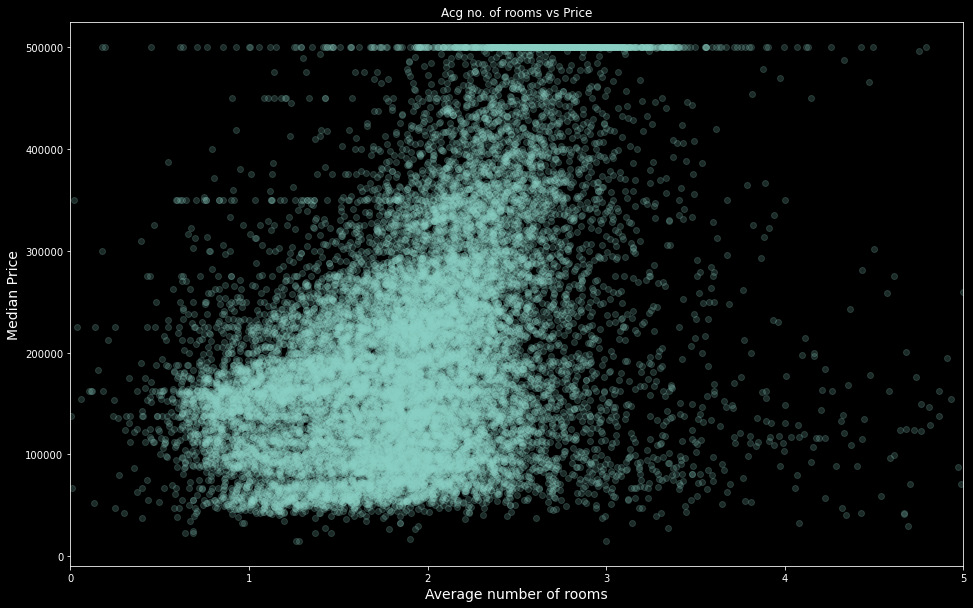

In [113]:
plt.figure(figsize=(16, 10))
plt.scatter(x= hd['avg_prehouse_room'], y=hd['median_house_value'], alpha=0.2)
plt.xlim(0,5)
plt.style.use('dark_background')
plt.xlabel('Average number of rooms', fontsize = 14)
plt.ylabel('Median Price', fontsize = 14)
plt.title('Acg no. of rooms vs Price')
plt.show()

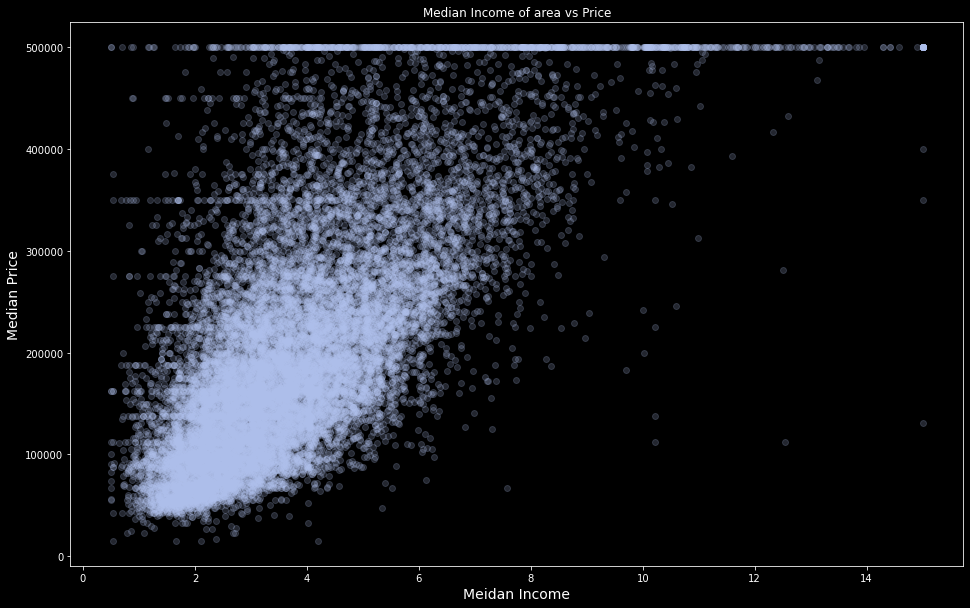

In [114]:
plt.figure(figsize=(16, 10))
plt.scatter(x= hd['median_income'], y=hd['median_house_value'], alpha=0.2, color='#b2c3ef')
plt.style.use('dark_background')
plt.xlabel('Meidan Income', fontsize = 14)
plt.ylabel('Median Price', fontsize = 14)
plt.title('Median Income of area vs Price')
plt.show()

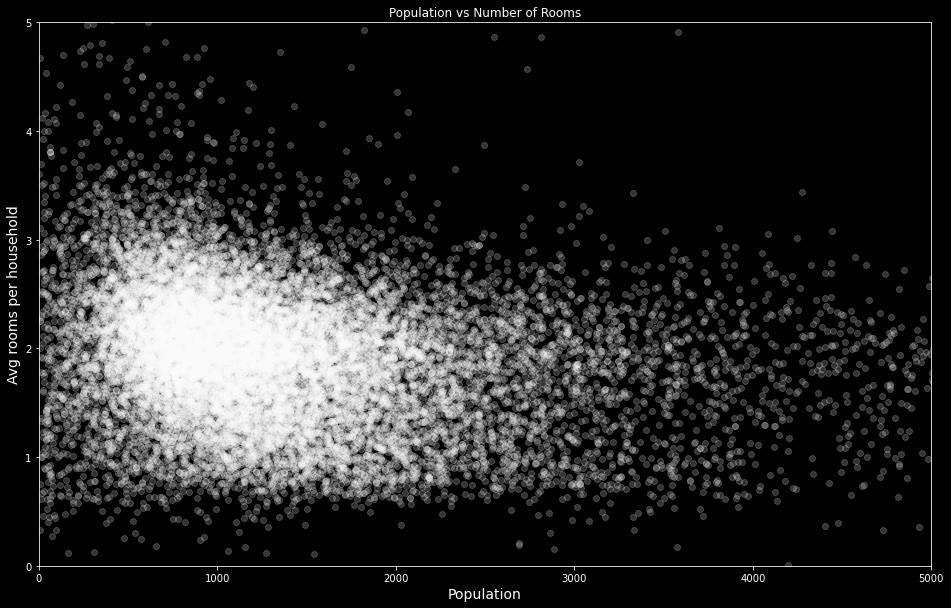

In [121]:
plt.figure(figsize=(16, 10))
plt.scatter(x= hd['population'], y=hd['avg_prehouse_room'], alpha=0.2, color='white')
plt.style.use('dark_background')
plt.xlim(0,5000)
plt.ylim(0,5)
plt.xlabel('Population', fontsize = 14)
plt.ylabel('Avg rooms per household', fontsize = 14)
plt.title('Population vs Number of Rooms')
plt.show()

## Regression Model

In [82]:
X = hd.drop('median_house_value',axis=1) # features
y = hd.iloc[:, -4]  # Dependent variable

In [83]:
print(X)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_

In [84]:
print(y)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64


### Encoding features

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [86]:
print(X)

[[0.         0.         0.         ... 8.3252     0.39130435 2.73291925]
 [0.         0.         0.         ... 8.3014     0.47396918 2.95668471]
 [0.         0.         0.         ... 7.2574     0.35685484 2.95766129]
 ...
 [0.         1.         0.         ... 1.7        0.42999007 2.23833168]
 [0.         1.         0.         ... 1.8672     0.47098516 2.51012146]
 [0.         1.         0.         ... 2.3886     0.38211968 2.00793079]]


### Splitting the data

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [96]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train[:,:] = sc.fit_transform(X_train[:, :]) 
X_test[:, :] = sc.transform(X_test[:, :])

### Training the model

In [97]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Intercept', regressor.intercept_)


Intercept 206833.63492160596


### Predicting the results

In [101]:
regressor.score(X_train, y_train)

0.6769156885044858

In [102]:
regressor.score( X_test, y_test)

0.6632947539458127

### Our model has an accuracy of 66.32%